In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.offline as pyo
pyo.init_notebook_mode()

In [74]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [75]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [76]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

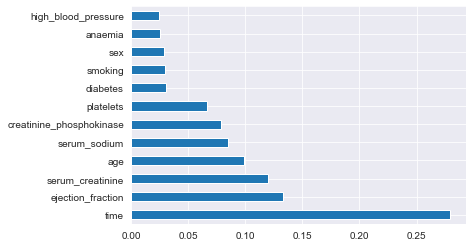

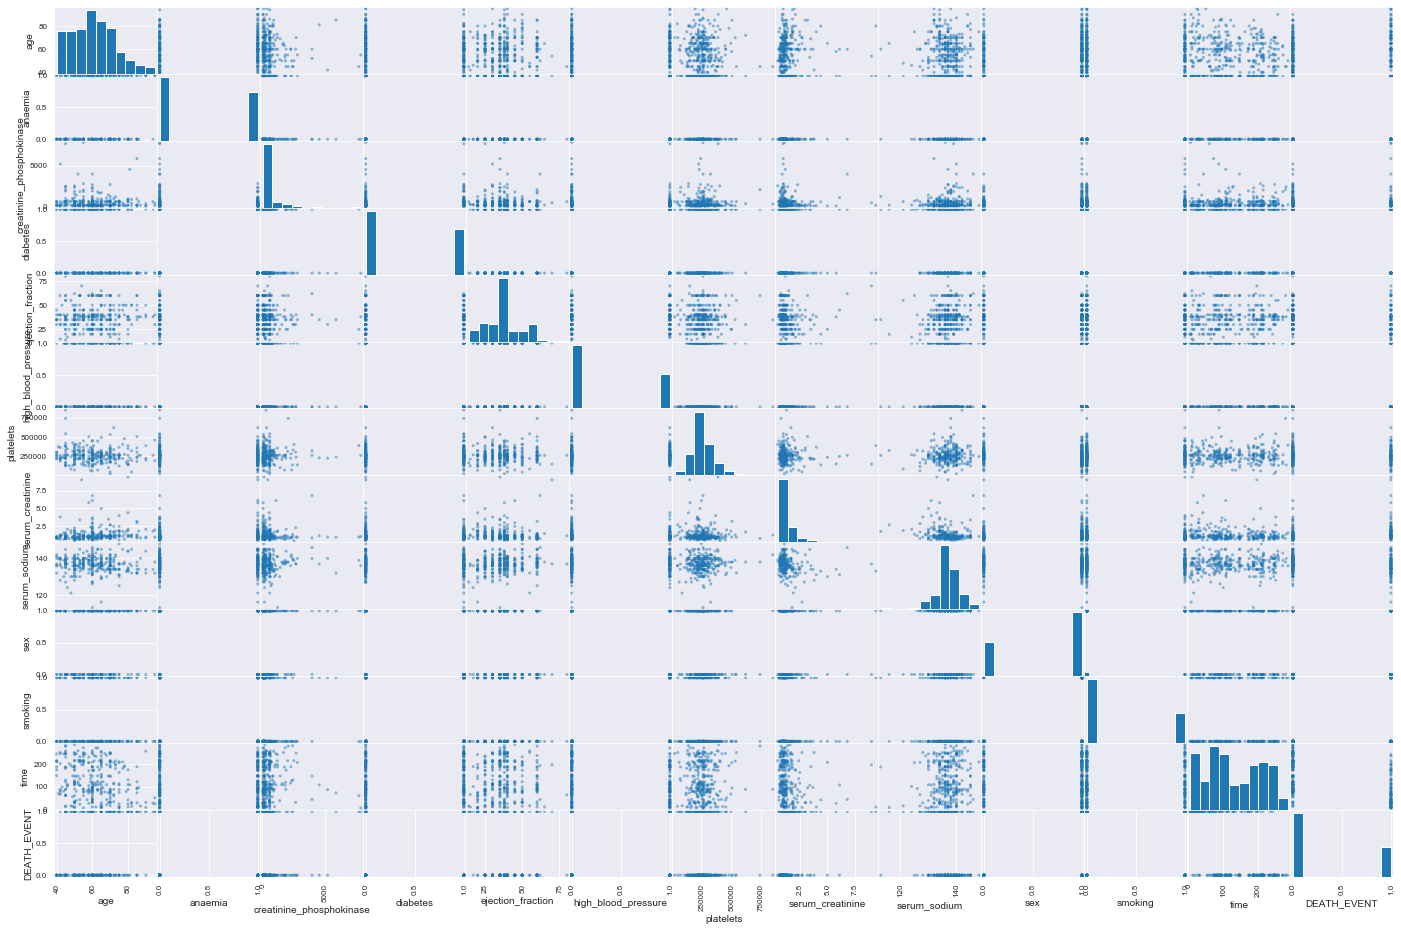

In [77]:
# Feature Analysis
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
f_importance = pd.Series(model.feature_importances_, index=x.columns)
sns.set_style("darkgrid")
f_importance.nlargest(12).plot(kind="barh")
plt.show()

scatter_matrix(df, figsize=(24,16))#df[["serum_sodium", "age", "serum_creatinine", "ejection_fraction", "time", "DEATH_EVENT"]], figsize=(12,8))
plt.show()

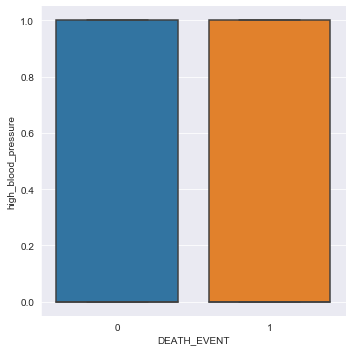

(0.37142857142857144, 0.29381443298969073)

In [78]:
sns.catplot(x="DEATH_EVENT", y="high_blood_pressure", kind="box", data=df)
plt.show()
df[df["DEATH_EVENT"]==1]["high_blood_pressure"].describe(), df[df["DEATH_EVENT"]==0]["high_blood_pressure"].describe()
df[df["high_blood_pressure"]==1]["DEATH_EVENT"].mean(), df[df["high_blood_pressure"]==0]["DEATH_EVENT"].mean()

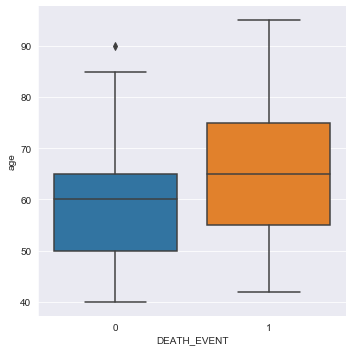

In [79]:
# Select Top 5 Features and Analyze their distributions
sns.catplot(x="DEATH_EVENT", y="age", kind="box", data=df)
plt.show()
#df = df[df["age"]<90]

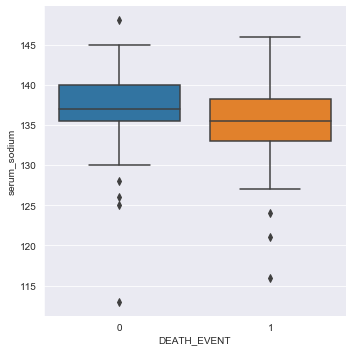

In [80]:
sns.catplot(x="DEATH_EVENT", y="serum_sodium", kind="box", data=df)
plt.show()
#df = df[df["serum_sodium"]>127]

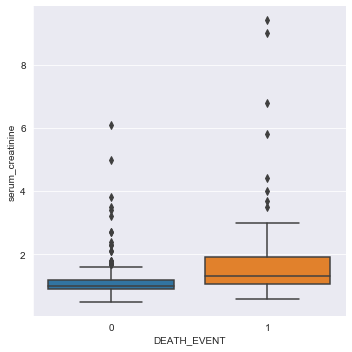

In [81]:
sns.catplot(x="DEATH_EVENT", y="serum_creatinine", kind="box", data=df)
plt.show()
#df = df[df["serum_creatinine"]]

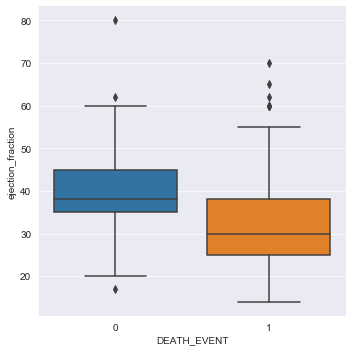

In [82]:
sns.catplot(x="DEATH_EVENT", y="ejection_fraction", kind="box", data=df)
plt.show()
df = df[df["ejection_fraction"]<70]

In [83]:
sns.catplot(x="DEATH_EVENT", y="time", kind="box", data=df)
plt.show()

In [84]:
x = df.iloc[:,:-1]#df[["age", "time", "ejection_fraction", "serum_creatinine", "serum_sodium"]]
y = df["DEATH_EVENT"]

In [85]:
x, y

(      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0    75.0        0                       582         0                 20   
 1    55.0        0                      7861         0                 38   
 2    65.0        0                       146         0                 20   
 3    50.0        1                       111         0                 20   
 4    65.0        1                       160         1                 20   
 ..    ...      ...                       ...       ...                ...   
 294  62.0        0                        61         1                 38   
 295  55.0        0                      1820         0                 38   
 296  45.0        0                      2060         1                 60   
 297  45.0        0                      2413         0                 38   
 298  50.0        0                       196         0                 45   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

In [86]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [87]:
x_train, x_test, y_train, y_test

(      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 284  50.0        1                        54         0                 40   
 82   60.0        1                        76         1                 25   
 109  45.0        0                       292         1                 35   
 147  64.0        0                      1610         0                 60   
 219  55.0        0                       582         1                 35   
 ..    ...      ...                       ...       ...                ...   
 253  70.0        0                        88         1                 35   
 193  73.0        1                       231         1                 30   
 118  65.0        1                       113         1                 60   
 47   60.0        0                       582         1                 38   
 173  50.0        1                       115         0                 20   
 
      high_blood_pressure  platelets  serum_creatinine  serum_

In [88]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = classifier.predict(x_test)

# Making Confusion Matrix and calculating accuracy score
mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[40  3]
 [ 5 12]]
0.8666666666666667


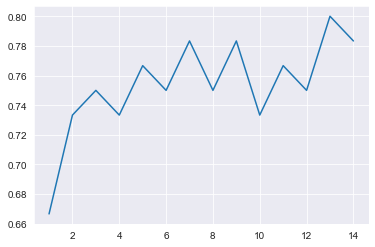

In [90]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(1,15):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,15)), list1)
plt.show()

In [91]:

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[42  1]
 [13  4]]
0.7666666666666667


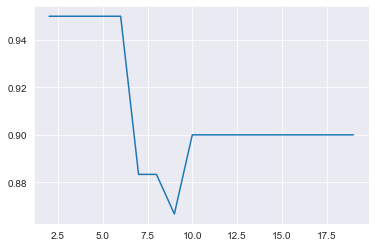

In [92]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,20):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,20)), list1)
plt.show()

In [93]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)

[[43  0]
 [ 3 14]]
0.95


99


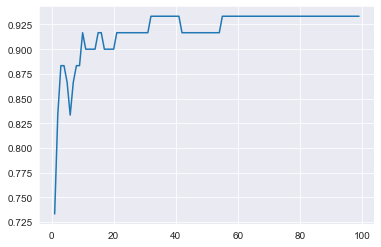

In [94]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(1,100):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
print(len(list1))
plt.plot(list(range(1,100)), list1)
plt.show()

In [95]:
classifier = RandomForestClassifier(n_estimators = 25, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[41  2]
 [ 3 14]]
0.9166666666666666


5


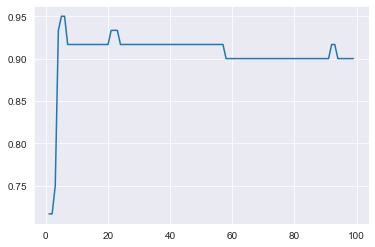

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
list1 = []
bestEst = None
bestScore = 0
for estimators in range(1, 100):
    classifier = GradientBoostingClassifier(n_estimators = estimators, random_state=0, subsample=1, learning_rate=0.1, criterion='mse', loss="deviance")
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    score_ = accuracy_score(y_test,y_pred)
    if score_ > bestScore:
        bestScore = score_
        bestEst = estimators
    list1.append(score_)
    
print(bestEst)
plt.plot(list(range(1,100)), list1)
plt.show()

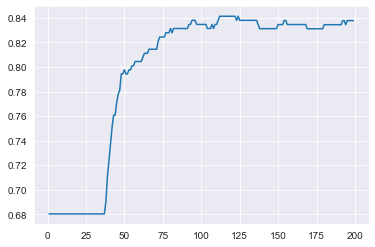

112 0.8413793103448276


In [195]:
# Now to try this with cross validation to get better representation and performance 
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
cv.get_n_splits(x, y)

scores = []

bestEst = 0
bestScore = 0

for est in range(1, 200):
    
    clf = GradientBoostingClassifier(n_estimators = est, random_state=0, subsample=1, learning_rate=0.01, criterion='friedman_mse', loss="exponential")
    # clf = RandomForestClassifier(n_estimators = est, random_state=0, criterion='entropy')
    subScores = []
    for train, test in cv.split(x, y):
        #Init each fold
        x_train, x_test = x.iloc[train, :], x.iloc[test, :]
        y_train, y_test = y.iloc[train], y.iloc[test]
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        score_ = accuracy_score(y_test,y_pred)
        
        subScores.append(score_)
    avgScore = np.mean(subScores)
    if avgScore > bestScore:
        bestScore = avgScore
        bestEst = est
    scores.append(avgScore)
plt.plot(list(range(1,len(scores)+1)), scores)
plt.show()
print(bestEst, bestScore)

In [ ]:
scores = []

bestEst = 0
bestScore = 0

for est in range(1, 200):
    
    #clf = GradientBoostingClassifier(n_estimators = est, random_state=0, subsample=1, learning_rate=0.01, criterion='friedman_mse', loss="exponential")
    clf = RandomForestClassifier(n_estimators = est, random_state=0, criterion='entropy')
    subScores = []
    for train, test in cv.split(x, y):
        #Init each fold
        x_train, x_test = x.iloc[train, :], x.iloc[test, :]
        y_train, y_test = y.iloc[train], y.iloc[test]
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        score_ = accuracy_score(y_test,y_pred)
        
        subScores.append(score_)
    avgScore = np.mean(subScores)
    if avgScore > bestScore:
        bestScore = avgScore
        bestEst = est
    scores.append(avgScore)

plt.plot(list(range(1,len(scores)+1)), scores)
plt.show()
print(bestEst, bestScore)

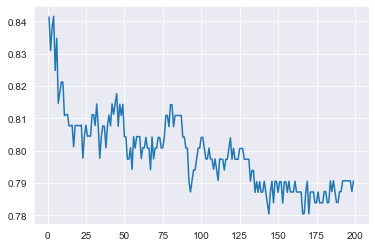

4 0.8416091954022988


In [194]:
scores = []
from sklearn.ensemble import AdaBoostClassifier
bestEst = 0
bestScore = 0

for est in range(1, 200):
    
    #clf = GradientBoostingClassifier(n_estimators = est, random_state=0, subsample=1, learning_rate=0.01, criterion='friedman_mse', loss="exponential")
    clf = AdaBoostClassifier(n_estimators = est, random_state=0)
    subScores = []
    for train, test in cv.split(x, y):
        #Init each fold
        x_train, x_test = x.iloc[train, :], x.iloc[test, :]
        y_train, y_test = y.iloc[train], y.iloc[test]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        score_ = accuracy_score(y_test,y_pred)
        
        subScores.append(score_)
    avgScore = np.mean(subScores)
    if avgScore > bestScore:
        bestScore = avgScore
        bestEst = est
    scores.append(avgScore)

plt.plot(list(range(1,len(scores)+1)), scores)
plt.show()
print(bestEst, bestScore)